In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Questão 1

In [91]:
#leitura da imagem com a função imread()

imagem = cv2.imread('Fig0459(a)(orig_chest_xray).tif')
print('Largura em pixels: ', end='')
print(imagem.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2])

Largura em pixels: 596
Altura em pixels: 416
Qtde de canais: 3


a)

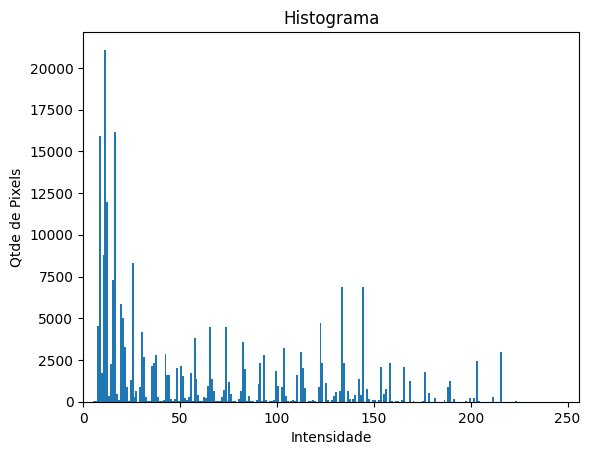

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [92]:
im1 = cv2.imread('Fig0459(a)(orig_chest_xray).tif')
img = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()

Ao observar o histograma original é possível perceber a presença de muitos tons escuros, fazendo com que a imagem não possua muitos detalhes.

b)

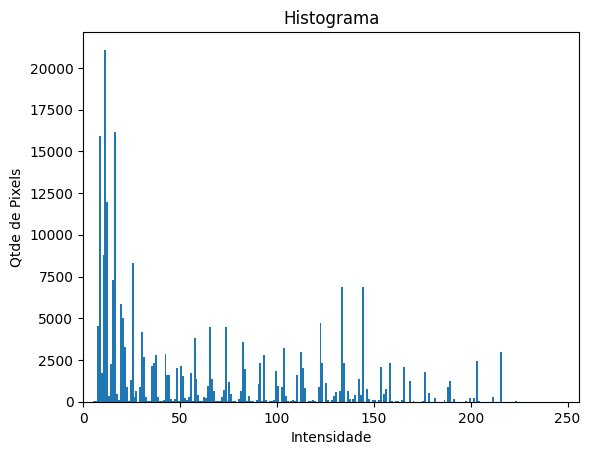

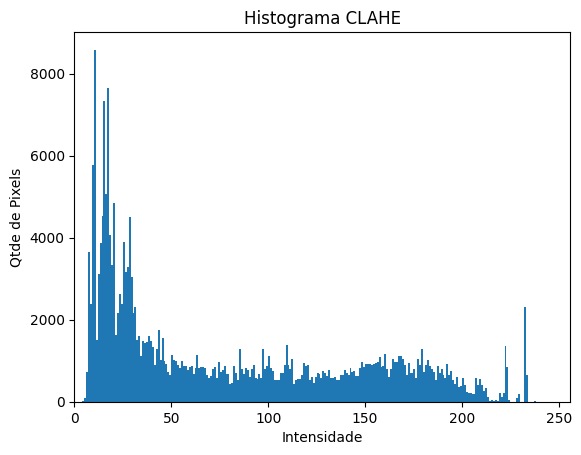

-1

In [93]:
#operação de equalização do histograma:
h_eq = cv2.equalizeHist(img)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
cl1 = clahe.apply(img)


plt.figure()
plt.title("Histograma")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()
plt.title("Histograma CLAHE")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(cl1.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

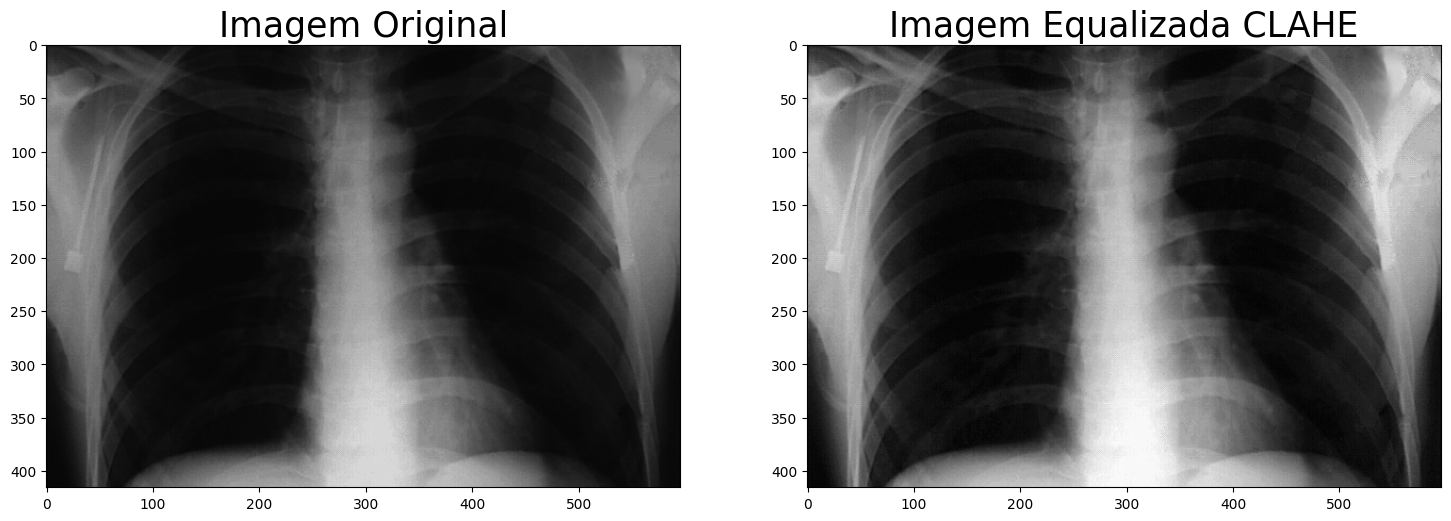

In [94]:
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(im1, cmap ='gray');plt.title('Imagem Original',size=25)
plt.subplot(1,2,2);plt.imshow(cl1, cmap ='gray');plt.title('Imagem Equalizada CLAHE',size=25);

Como o CLAHE é uma variante da equalização de histograma que melhora o contraste da imagem, é relevante usar esse tipo de equalização nessa imagem, visto que a deixou mais rica em detalhes.

#Questão 2

valor maximo de pixel da imagem original =  255 , e valor maximo de pixel da imagem normalizada =  1.0


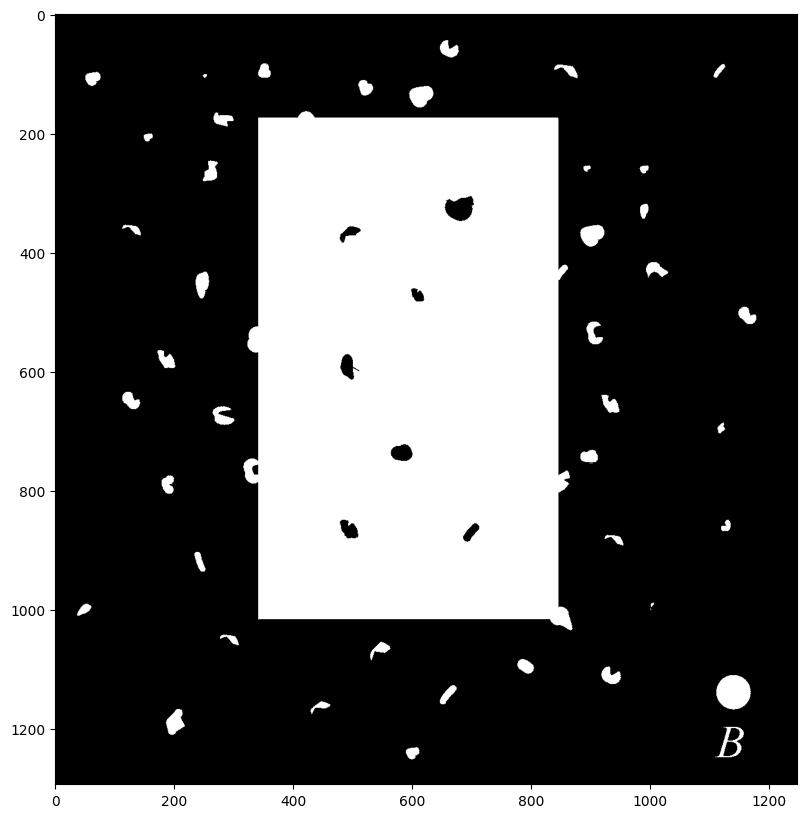

In [95]:
# IMPORTAR A IMAGEM
img = cv2.imread(r"FigP0917(noisy_rectangle).tif")

# NORMALIZAR A IMAGEM
img_n = (img - img.min())/(img.max() - img.min())

print("valor maximo de pixel da imagem original = ",img.max(), ', e valor maximo de pixel da imagem normalizada = ', img_n.max())

plt.figure(figsize = (10,10))
plt.imshow(img, cmap="Greys");

Erosão (A ⊝ B)

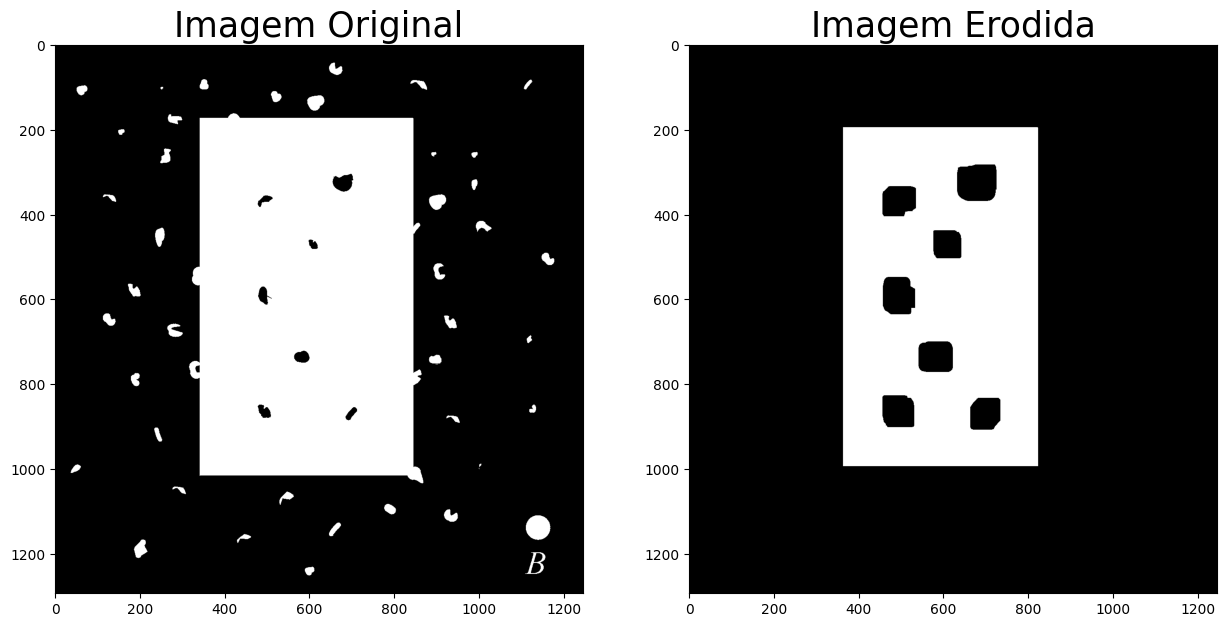

In [96]:
# KERNEL (k)
N = 45 #10
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode = cv2.erode(img_n, KQ)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.title('Imagem Original',size=25)
plt.subplot(1,2,2);plt.imshow(erode, cmap='gray');plt.title('Imagem Erodida',size=25);

Dilatação (A ⊕ B)

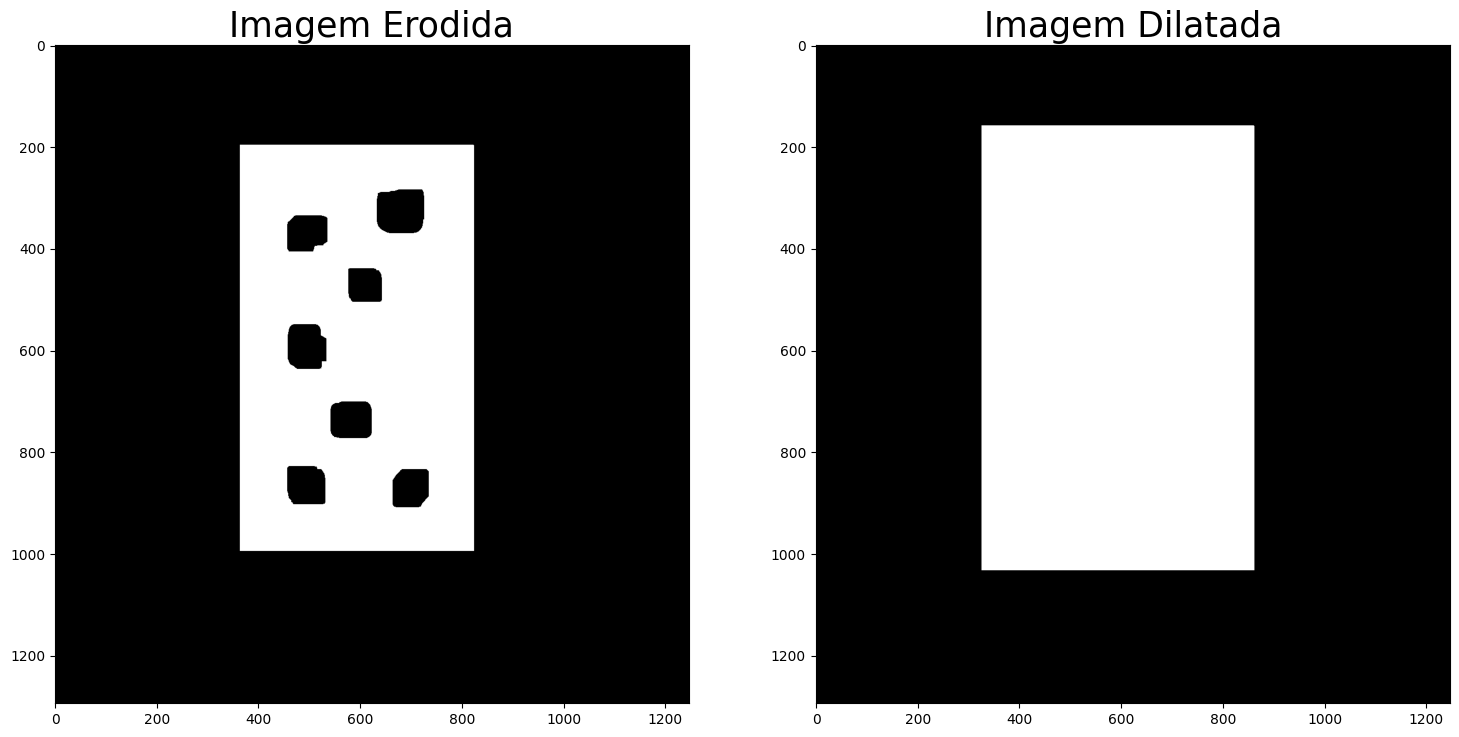

In [97]:
# KERNEL (k)
N = 77
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

dilate = cv2.dilate(erode, KQ, iterations=1)

plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(erode, cmap ='gray');plt.title('Imagem Erodida',size=25)
plt.subplot(1,2,2);plt.imshow(dilate, cmap ='gray');plt.title('Imagem Dilatada',size=25);

Erosão 2 (A ⊝ B)

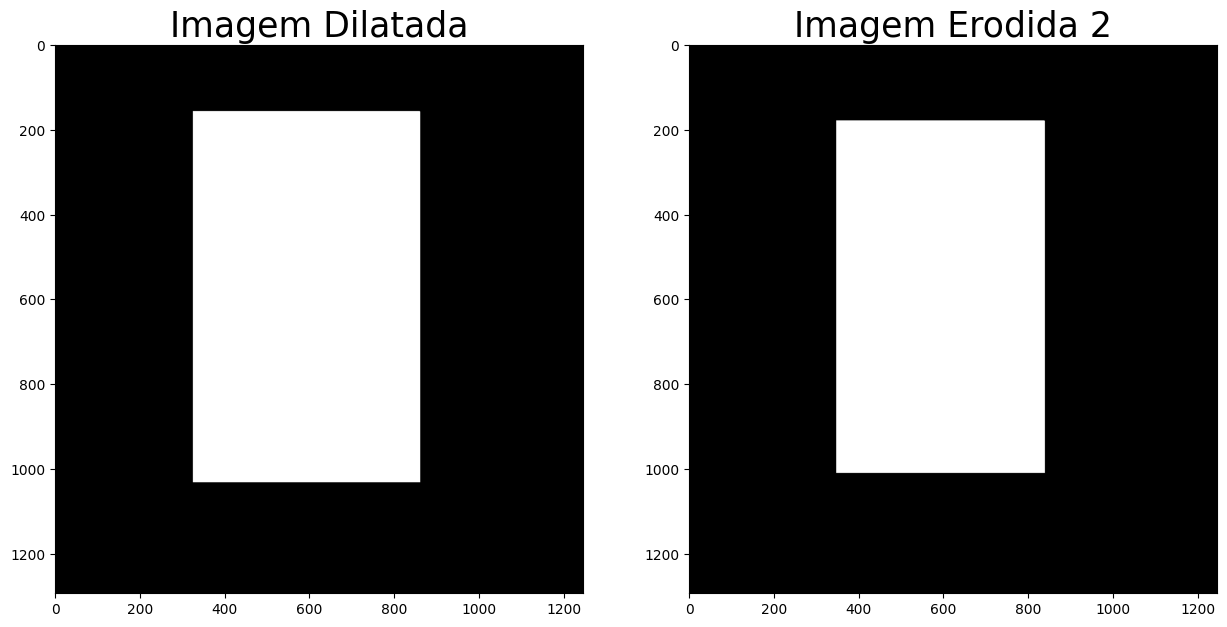

In [98]:
# KERNEL (k)
N = 45 #10
KR= cv2.getStructuringElement(cv2.MORPH_RECT,(N,N)) #   Mascara retangular
KE= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(N,N)) #  Mascara eliptica
KC= cv2.getStructuringElement(cv2.MORPH_CROSS,(N,N)) #   Mascara em cruz

KQ = KR # escolha da mascara

erode_2 = cv2.erode(dilate, KQ)

plt.figure(figsize=[15,10]);
plt.subplot(1,2,1);plt.imshow(dilate, cmap='gray');plt.title('Imagem Dilatada',size=25)
plt.subplot(1,2,2);plt.imshow(erode_2, cmap='gray');plt.title('Imagem Erodida 2',size=25);

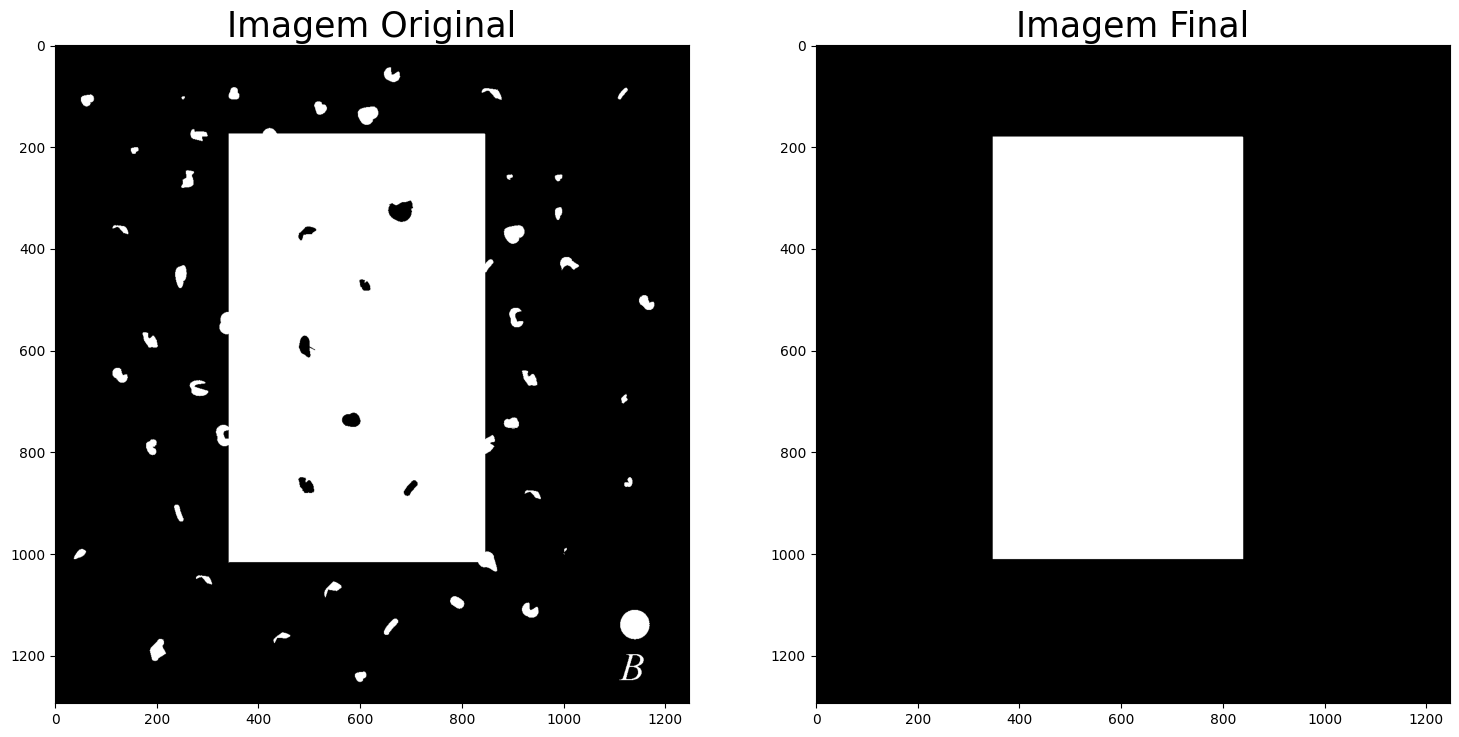

In [99]:
plt.figure(figsize=(18,10));
plt.subplot(1,2,1);plt.imshow(img, cmap ='gray');plt.title('Imagem Original',size=25)
plt.subplot(1,2,2);plt.imshow(erode_2, cmap ='gray');plt.title('Imagem Final',size=25);

Primeiramente foi aplicada erosão para eliminar os ruídos brancos na imagem. Depois foi aplicada dilatação para preencher os buracos no retângulo e, por fim, foi aplicada erosão novamente para reduzir o tamanho do retângulo para seu formato original, uma vez que a dilatação tinha feito com que ele aumentasse de tamanho.

#Questão 3

In [102]:
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig0918(a)(Chickenfilet with bones).tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

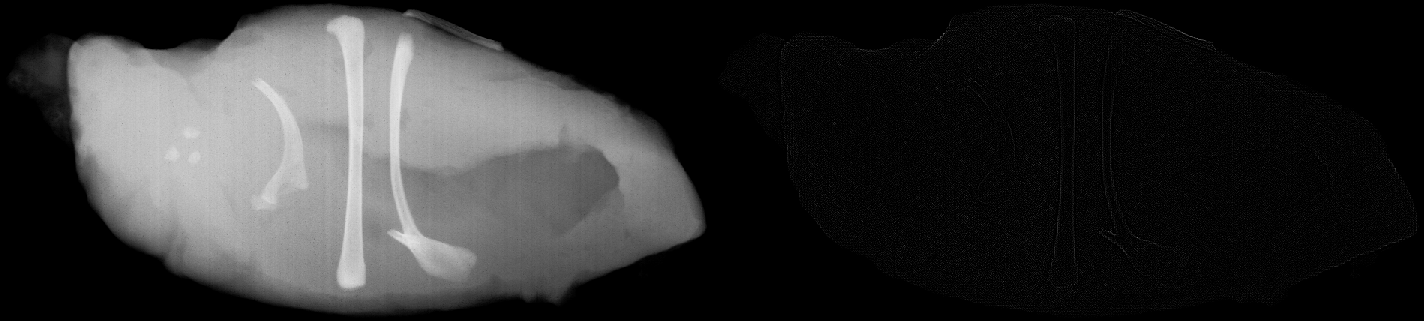

In [110]:
kernel1 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

#filter the source image
img_pa1 = cv2.filter2D(img_,-1,kernel1)

h_img = cv2.hconcat([img_, img_pa1])
cv2_imshow(h_img)

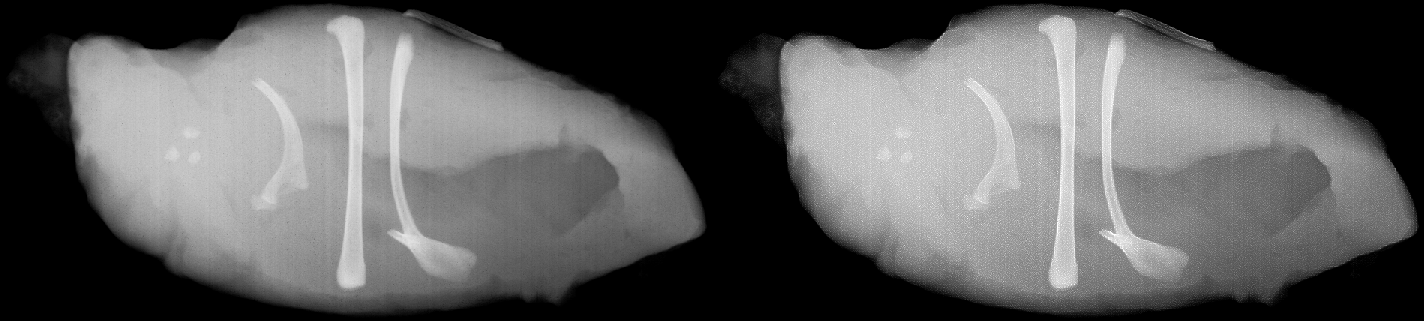

In [109]:
#AGUÇAMENTO:

agucamento=cv2.add(img_,img_pa1) #https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

h_img = cv2.hconcat([img_, agucamento])
cv2_imshow(h_img)

Após a realização do aguçamento é possível perceber que os detalhes da imagem foram realçados e as bordas da imagem estão mais nítidas.